<a href="https://colab.research.google.com/github/dangcute/laptrinhdulieu/blob/main/maudulieu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      Order        PID  MS SubClass  ... Sale Type  Sale Condition  SalePrice
0         1  526301100           20  ...       WD           Normal     215000
1         2  526350040           20  ...       WD           Normal     105000
2         3  526351010           20  ...       WD           Normal     172000
3         4  526353030           20  ...       WD           Normal     244000
4         5  527105010           60  ...       WD           Normal     189900
...     ...        ...          ...  ...       ...             ...        ...
2925   2926  923275080           80  ...       WD           Normal     142500
2926   2927  923276100           20  ...       WD           Normal     131000
2927   2928  923400125           85  ...       WD           Normal     132000
2928   2929  924100070           20  ...       WD           Normal     170000
2929   2930  924151050           60  ...       WD           Normal     188000

[2930 rows x 82 columns]
<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

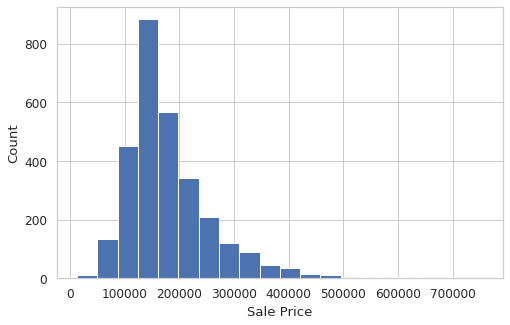

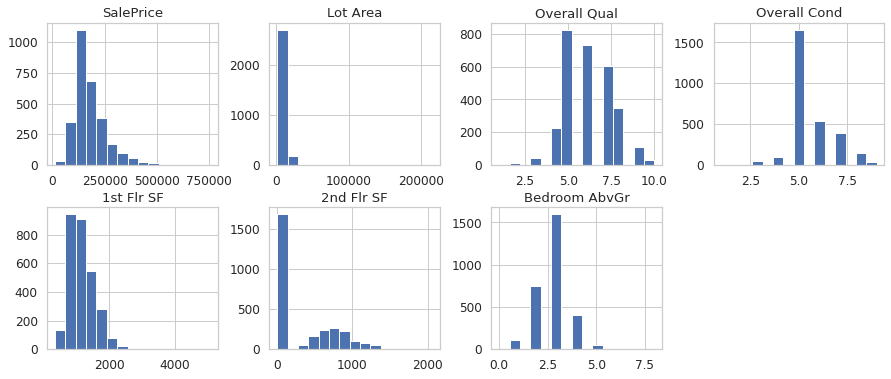

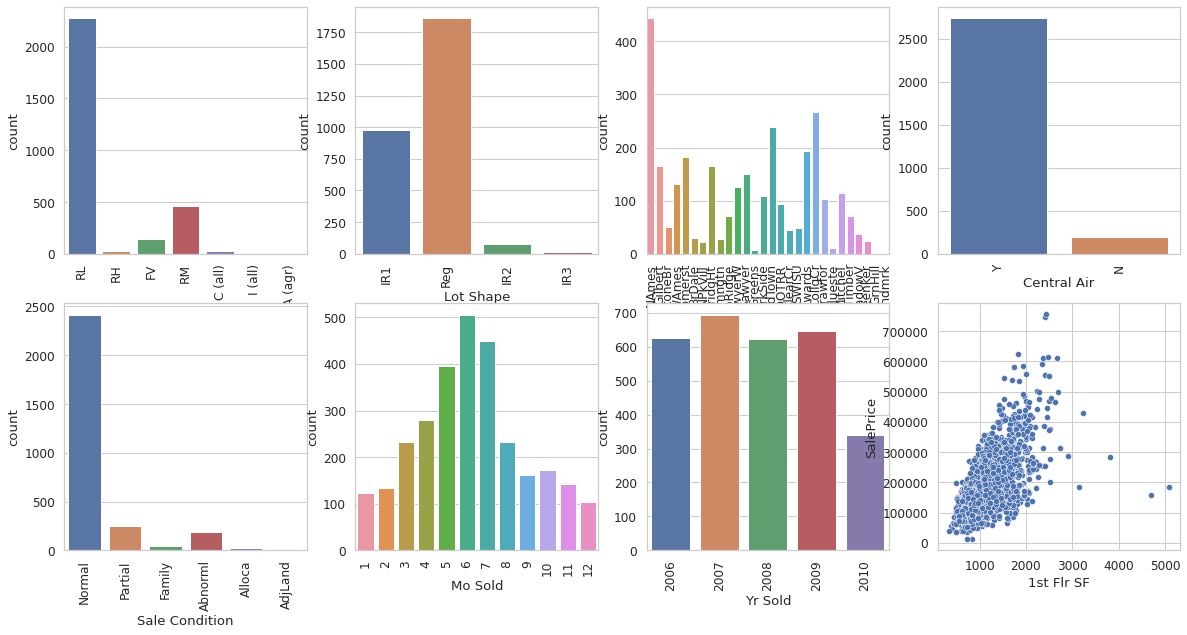

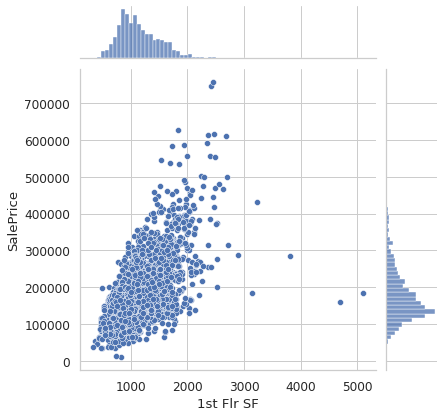

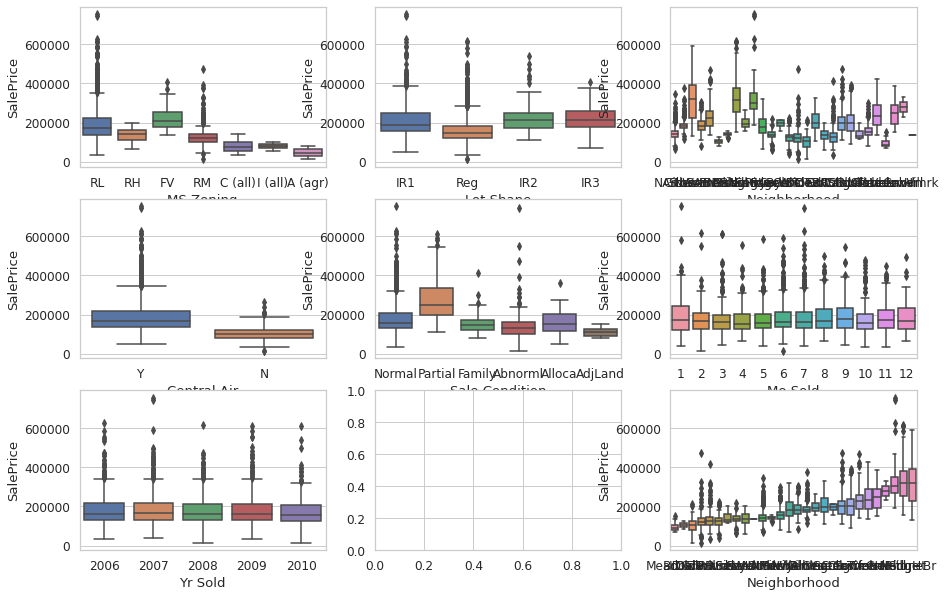

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
#Đưa dữ liệu vào
housing= pd.read_excel(io.BytesIO(uploaded["AmesHousing.xls"]))
print(housing)
numerical=['SalePrice','Lot Area','Overall Qual','Overall Cond','1st Flr SF','2nd Flr SF','Bedroom AbvGr']
categorical=['MS Zoning','Lot Shape','Neighborhood', 'Central Air', 'Sale Condition','Mo Sold','Yr Sold']
housing=housing[numerical+categorical]
housing.info()
#Phân tích biến định lượng
sns.set(style='whitegrid', palette='deep', font_scale=1.1, rc={'figure.figsize':[8,5]})
sns.distplot(housing['SalePrice'], norm_hist=False, kde=False, bins=20,hist_kws={'alpha':1}).set(xlabel='Sale Price', ylabel='Count')
housing[numerical].hist(bins=15, figsize=(15,6), layout=(2,4))
#phân tích biến phân loại
sns.countplot(housing['Sale Condition'])
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
  sns.countplot(housing[variable], ax=subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(90)
#Phân tích tương quan của các biến định lượng
sns.scatterplot(x=housing['1st Flr SF'], y=housing['SalePrice']);
sns.jointplot(x=housing['1st Flr SF'], y=housing['SalePrice']);
#Phân tích tương quan của các biến định lượng và biến phân loại
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
  sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))

In [3]:
import seaborn as sns
from google.colab import files
uploaded=files.upload()

Saving AmesHousing.xls to AmesHousing.xls
